> > > > *Gavin Chait, B.Sc., B.Sc.(Eng), data scientist at Whythawk*

---

> **Abstract**
>
> In February 2021, Whythawk, an open data research service, was asked to provide a standard quarterly-aggregated extract of commercial location data for local authorities in England and Wales. These data are derived from our Sqwyre commercial location data longitudinal study which integrates data from the master database of commercial hereditaments maintained by the Valuations Office Agency (VOA), and regularly-updated commercial ratepayers registers published by local authorities. During subsequent review, a potential anomoly was discovered in the quarterly aggregation for Barnsley Metropolitan Borough Council.
>
> This research report was initiated to investigate these data transitions and answer the following questions:
>
> - What aggregate VOA changes occurred during updates between April to December 2019 in terms of hereditaments added, withdrawn, or recategorised?
> - Were there any meaningful changes during the 2019 calendar year which may have influenced estimates for hereditament vacancy?
> - Within each series, what proportion of hereditaments can be unambiguously classified in terms of occupation status, and how does ambiguity arise?
> - What proportion of the total count of the hereditament base, as defined by the VOA, are represented in ratepayer data updates?
> - What proportion of Barnsley data, in terms of reference numbers and matching quality, can be merged into the VOA master database?
> - How are matches, and misses, reflected in vacancy tallies in general, temporally, and for each of the main categories of use (retail, office, industrial and leisure) considered in the initial study?
>
> The objective for the Sqwyre commercial location database is to produce a well-structured, standardised dataset for research and analysis. The specific defaults used to aggregate the historical record for a quarterly report for each hereditament are designed to ensure that restatements and corrections provided via regular updates from the Valuations Office Agency and local authorities take precedence over previous updates. Each successive update takes precedence over the ones which came before. This ensures corrections happen, but can also leave long-term errors in place if no subsequent updates, or corrections, are released.
>
> Sources of ambiguity which prevent integration of these datasets include:
>
> - Unclear, or missing, hereditament reference codes,
> - Duplicate rows with conflicting dates and occupation status,
> - Provided data not covering the complete list of VOA hereditaments,
> - Provided data for hereditaments not yet registered with VOA.
> 
> After a thorough review process, this research was able to replicate the results produced for the original quarterly-aggregated extract, and answer the research questions.
>
> The core deflators of Barnsley's stated vacancy rate in their October 2019 commercial ratepayer data release are:
> 
> - Understating the total number of hereditaments (declaring 8,765 vs 9,630 in the VOA register),
> - Ambiguous or irreconcilable hereditaments (138 out of 767 are ambiguous),
> - Including non-retail, office, industrial or leisure hereditaments in the total (55 hereditaments classified as `other` in the total).
>
> While overall vacancy in the earliest two Barnsley updates were 7.2% and 6.5% respectively, the fall in occupation seems to be precipitated by an enormous rise in the number of hereditaments as 2,000 new records are introduced. This increased the total hereditament count from 7,000 to 9,000, deflating the vacancy rate even as the absolute number of voids remained relatively consistent.
>
> A subsequent update, listed as "October 2020" not available at the time of the initial generation of the aggregation data but brought to our attention for inclusion in this review, increased overall vacancy rates to 7.6%. However, a period of 18 months passed between updates published by Barnsley, and this lack of data access meant that changes were not reflected as expected.
>
> Our recommendations for limiting the impact of such challenges are that local authorities must publish their register of commercial ratepayers quarterly and continuously, and that ambiguity can be limited by adoption of universal definitions and data structure standards through a defined schema.

---

# Background to this review

In February 2021, [Whythawk](https://whythawk.com), an open data research service, was asked to provide [a standard quarterly-aggregated extract of commercial location data](https://whythawk.com/index.php/research-reports/24-sqwyre-commercial-location-data-aggregations-for-england-and-wales-as-of-july-2020) for local authorities in England and Wales. These data are derived from our [Sqwyre](https://sqwyre.com) commercial location data longitudinal study. During subsequent review, a potential anomoly was discovered in the quarterly aggregation for Barnsley Metropolitan Borough Council.

![Barnsley Voids & Occupation Overview](data/barnsley-voids-overview.png)

*Figure 1: Barnsley Voids & Occupation Overview, source: Sqwyre.com - blue: office | green: industrial | red: retail | yellow: leisure*

Our foundation data are that produced by the [Valuations Office Agency (VOA)](https://voaratinglists.blob.core.windows.net/html/rlidata.htm), enriched with ratepayer occupation and rates-paid data provided by contributing local authorities. Where local authority data are missing for any reason, we do not predict occupation or vacancy for individual hereditaments, but set them as `occupied`.

The timeline of the large deviations in Barnsley's aggregate void data are:

- Barnsley first cross-referenced data release in Q2 2017, six months after the start of our data series, leading to an initial 0% vacancy as a result of our default approach,
- Transition from 2010 to 2017 rates valuation in April 2017 appears to coincide with a dramatic change in categorisation of hereditaments from office to leisure. This is unexplained,
- In October 2019 we received the last update from Barnsley for what would be about 18 months. That update resulted in a dramatic change in voids. This is unexplained.

As can be seen in *Figure 2*, greater than 90% of Barnsley's published data match that of the VOA, meaning that the source of these unexplained transitions may not lie directly (unless all 3-4% of unmatched data are also voids).

![Barnsley Update History](data/barnsley-update-history.png)

*Figure 2: Barnsley Update History, source: Sqwyre.com*

Further, this is unlikely to be a generalised problem inherent in the Sqwyre software or methodology as Barnsley is an outlier. While such phase transitions have occassionally been noted in other authorities, they are often explained by poor quality source data. These events do not seem to synchronise, as can be seen in *Figure 3* where the total England and Wales aggregate data do not exhibit these massive deviations.

![England & Wales Vacancy Rates](data/england-wales-vacancy-rates.png)

*Figure 3: England & Wales Vacancy Rates, source: Sqwyre.com - blue: office | green: industrial | red: retail | yellow: leisure*

This research report was initiated to investigate these data transitions.

# Research questions

It is unclear whether any assumed data anomolies occur in the VOA data, the local authority releases, Sqwyre methodology and assumptions, or some combination. As such, each will be tested individually, and then together. To ensure complete transparency and replication, all code, source data, and output are presented in this Jupyter Notebook.

## Questions concerning Valuations Office Agency data

The VOA has a fortnightly update cycle, releasing changes to the 2017 register directly to their [repository](https://whythawk.com/index.php/research-reports/24-sqwyre-commercial-location-data-aggregations-for-england-and-wales-as-of-july-2020). There is a mostly-complete [schema definition](https://voaratinglists.blob.core.windows.net/html/documents/2017%20Compiled%20List%20and%20SMV%20Data%20Specification.pdf) published which explains the structure of the data. Whythawk has engaged with the VOA regularly to gain insight into database decisions, explore missing categorisation definitions, or understand incomplete methodology.

- What aggregate VOA changes occurred during updates between April to December 2019 in terms of hereditaments added, withdrawn, or recategorised?
- Were there any meaningful changes during the 2019 calendar year which may have influenced estimates for hereditament vacancy?

## Questions concerning Barnsley Metropolitan Borough Council data

Barnsley historically had a relatively consistent commercial ratepayer data release schedule, with updates to the end of April and October each year. Initially, they did not provide the unique reference numbers necessary to import and merge their data, and so their first captured release is for April 2017. Updates were continuous till October 2019, when they stopped, resuming again only in 2021. No schema or metadata are provided. Their data is [found here](https://www.barnsley.gov.uk/services/business-rates/requests-for-information-about-business-rates/).

The datasets included in this study are those with release dates from April 2017 to October 2019, and October 2020 included (but did not form part of the data under review, since this series was not available at the time).

- Within each series, what proportion of hereditaments can be unambiguously classified in terms of occupation status, and how does ambiguity arise?
- What proportion of the total count of the hereditament base, as defined by the VOA, are represented in ratepayer data updates?

## Questions concerning merged VOA and Barnsley data

- What proportion of Barnsley data, in terms of reference numbers and matching quality, can be merged into the VOA master database?
- How are matches, and misses, reflected in vacancy tallies in general, temporally, and for each of the main categories of use (retail, office, etc) considered in the initial study?

## Scope of work and study limitations

The period for the research will be limited to the 2017 VOA rates valuation data series, and for the period 1 April 2017 to 31 December 2019. We are only interested in reasons relating to void classification. Floor area or rates valuations changes, and hereditament durations of occupation or vacancy, do not form part of this review.

To ensure replication and review, data of concern have been extracted from the Sqwyre database as CSV files, and available with this release. This automatically simplifies the range of queries possible, since the data are no longer part of a larger, more enriched, database. 

VOA data releases are continuous, and ordinary practice is to reconcile all data released to date (at the time of a merge and aggregation) to generate reports. Given that subsequent releases can restate the past, and that the dates of concern are 18 months in arrears of updates, what follows can only be a proxy for the original analysis.

# Valuations Office Agency data review

Commercial rates are a legal requirement and must be paid on all hereditaments considered to be in a lettable / habitable state. The official definition of hereditament is somewhat self-referential: 

> *"Hereditament" means property which is or may become liable to a rate, being a unit of such property which is, or would fall to be, shown as a separate item in the valuation list.*

In practical terms, these are individual, unique commercial units at specific addresses.

For England and Wales, these data are developed and maintained by the VOA. Their rates valuations are closest to the true (rather than quoted) rentals paid by each tenant. They release updates to their 2010 and 2017 ratings lists fortnightly, issuing adjustments to valuations of existing hereditaments, or removing and adding hereditaments to the list. Each is assigned a category of use (SCAT) from a list of 457 types. The next revaluation will be for 2023.

Hereditaments themselves may include multiple distinct components (store rooms, offices, mezzenine floors, etc.), each rated according to their classification, but being summed to a total floor area and rental valuation for each hereditament. For the sake of simplicity, we do not consider these subcomponents in our analysis but use only the total hereditament data.

Some 10% of the VOA's data are incorrectly coded, or contain missing data or errors. The process of gap-filling and error-correction is performed at the geospatial level. The Office of National Statistics (ONS) publish quarterly updates to their postcode database. We match hereditaments to postcodes, to code each with their appropriate latitude and longitude.

We run two processes to ameliorate these data issues, the first to add or correct postcodes, the second to interpolate for missing floor areas. This is run every two weeks, since VOA fortnightly updates introduce new errors from their processes.

1. *Postcodes:* All VOA addresses with postcodes are checked against the master ONS list. Each item with malformed or missing postcodes is checked against nearby addresses with known postcodes from the master list (starting in the same street, then the same town) to find the closest approximate address. This is performed using an implementation of the [Levenshtein Distance](https://en.wikipedia.org/wiki/Levenshtein_distancehttps://en.wikipedia.org/wiki/Levenshtein_distance), a natural language processing mechanism for estimating similarity between text. Our objective is to situate an hereditament as close as possible to its accurate position.
2. *Floor area:* This is a geospatial algorithmic interpolation step. Each hereditament with a missing floor area is added to a list. For each, filter by distance, taking the nearest addresses with the same categorisation and with a known floor area. For the filtered items with known floor area, divide the rateable value by floor area to get per-m2 values. For the hereditament being assessed, /m2/rateable value = m2 for that site.

Each hereditament is assigned Standard Industry Codes (SICs) for businesses likely to occupy those sites based on the SCATs assigned by the VOA. For example, a `Warehouse` could be used for `Construction`, `Transport`, but also `Wholesale Trade`. These SIC categorisations must hold, subject to deliberate change of use, irrespective of future or previous occupants.  Between them, the SCATs and SICs define building type, and its long-term potential for use.

Finally, updates may be active retrospectively. A floor area, categorisation or valuation change may be effective any time in arrears of the VOA update. These are consolidated into the overall database.

These location data form our foundation list of all commercial locations in England and Wales for further enrichment with ratepayer, occupation, employment and econometric data. The data extract provided as source are extracted from this Sqwyre database and include all updates available till 31 March 2021.

What follows is `Python` code to develop our research questions further.

In [1]:
################################################################################
# Imports and constants
################################################################################
%matplotlib inline
import pandas as pd
import numpy as np
import os
import pytz
from datetime import date, datetime, timedelta

# Specify source
directory = "data/"

In [2]:
################################################################################
# 1. Valuations Office Agency data review
################################################################################
#  - What aggregate VOA changes occurred during updates between April to 
#    December 2019 in terms of hereditaments added, withdrawn, or recatogorised?
#  - Were there any meaningful changes during the 2019 calendary year which may 
#    have influenced estimates for hereditament vacancy?
################################################################################

# Open Barnsely VOA data as a Pandas dataframe
dtype_dict = {
    "location_code": str,
    "rates_code": str
}
parse_dates = ["report_date", "created_date", "effective_date", 
               "start_date", "end_date"]
voa_barnsely_source = "barnsley-2017-valuation-data.csv"
df = pd.read_csv(directory + voa_barnsely_source, 
                 dtype=dtype_dict, 
                 parse_dates=parse_dates)
################################################################################
# NOTE: a significant challenge is that VOA update cycles don't map nicely to
#       frequency of release or a date. The below uses filter_date as a proxy
#       and report_date for subsequent sorting and filtering.
################################################################################
df["filter_date"] = df["start_date"]
df["filter_date"].fillna(df.effective_date, inplace=True)
df.sort_values(by=["update_cycle", "filter_date"], inplace=True)

aggregation = {
    "update_cycle": [],
    "count_total": [],
    "count_added": [],
    "count_removed": [],
    "count_changed": []
}

previous_references = set()
for update_cycle, group in df.groupby("update_cycle"):
    if previous_references:
        # Sort the group by report date and take the latest
        group = group.copy()
        group.sort_values(by=["report_date"], inplace=True)
        group.dropna(subset=["report_date"], inplace=True)
        group.drop_duplicates(keep="last", inplace=True)
        # Get all unique rates codes in this update cycle
        current_references = set(group["rates_code"].tolist())
        # Get all active rates codes as at last update cycle
        # NOTE: VOA use 'floor_area' and 'rental_valuation' as 
        #       methods to store information about the activity 
        #       status of hereditaments,
        #       None, 0 or 1 mean a hereditament is usually not active
        active_references = set(df[(~df["floor_area"].isin([None, 0, 1])) 
                                   &
                                   (~df["rental_valuation"].isin([None, 0, 1])) 
                                   & 
                                   (df["update_cycle"] < update_cycle)
                                  ]["rates_code"].unique())
        # Get inactive references in latest release
        current_inactive_references = set(group[(group["floor_area"
                                                      ].isin([None, 0, 1])) |
                                                (group["rental_valuation"
                                                      ].isin([None, 0, 1]))
                                                ]["rates_code"].unique())
        # Start aggregation
        aggregation["update_cycle"].append(update_cycle)
        count_added = len(current_references - previous_references)
        count_removed = len(active_references & current_inactive_references)
        count_changed = len(current_references) - count_added - count_removed
        count_total = len(previous_references) + count_added
        aggregation["count_added"].append(count_added)
        aggregation["count_removed"].append(count_removed)
        aggregation["count_changed"].append(count_changed)
        aggregation["count_total"].append(count_total)
    previous_references |= set(group["rates_code"].tolist())

<AxesSubplot:xlabel='update_cycle'>

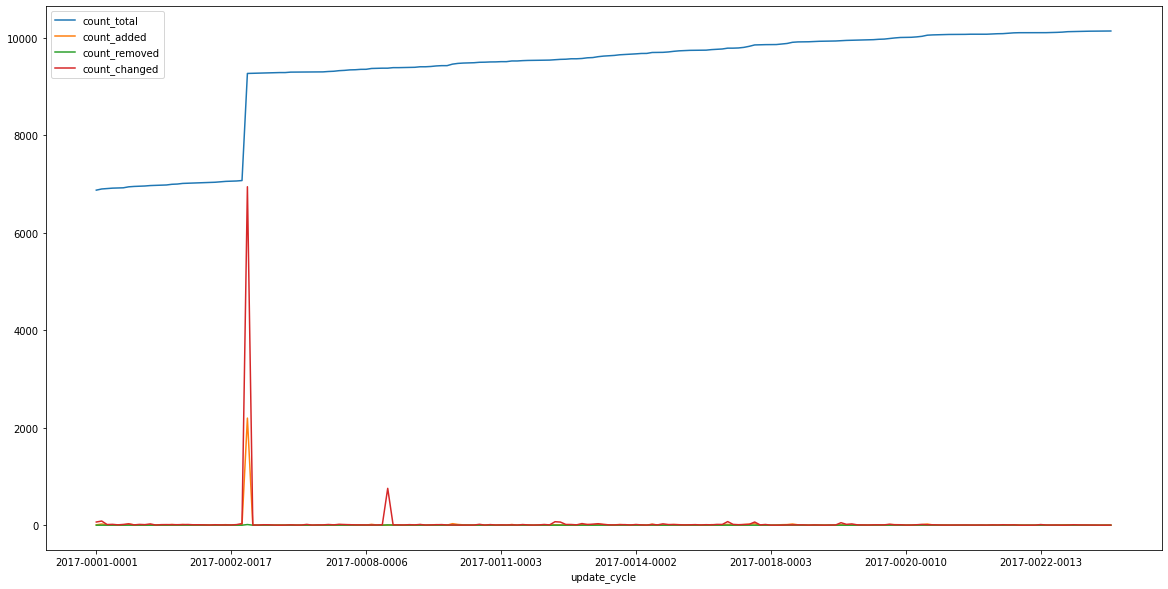

In [3]:
################################################################################
# Changes in each update - full series
################################################################################
df_aggregation = pd.DataFrame.from_dict(aggregation)
df_aggregation.set_index("update_cycle", inplace=True)
df_aggregation.plot(figsize=(20,10))

<AxesSubplot:xlabel='update_cycle'>

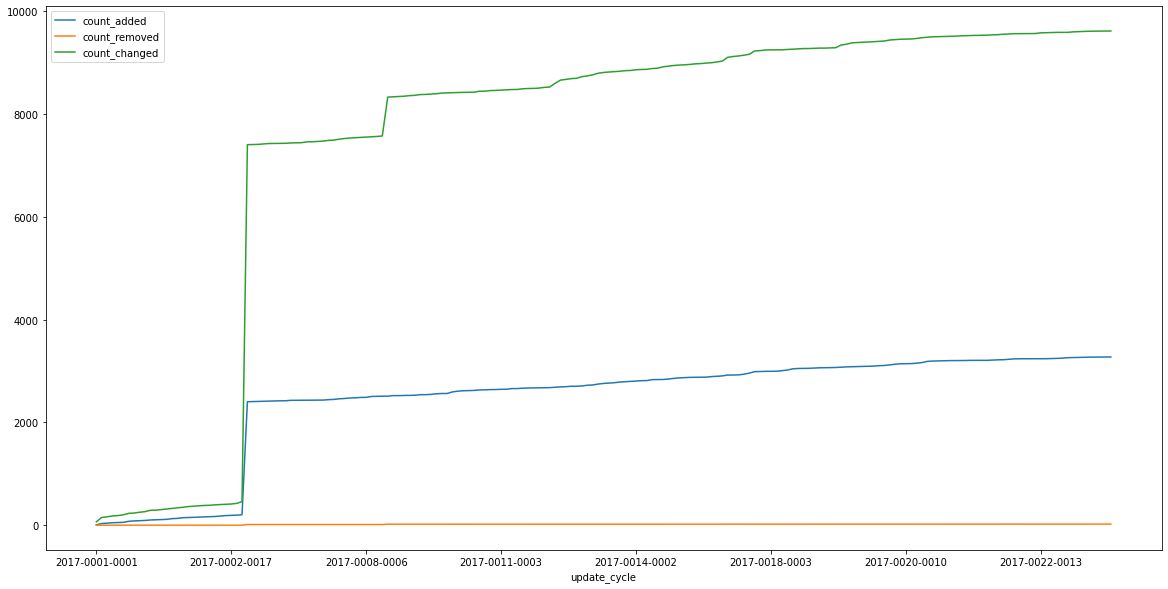

In [4]:
################################################################################
# Cumulative changes in each update - full series
################################################################################
df_aggregation[["count_added", "count_removed", "count_changed"]
              ].cumsum().plot(figsize=(20,10))

One of the large deviations in Barnsley's data during mid-2017 was an unusual swap of classification between office and leisure use. This appears to be explained by a dramatic set of changes in the 2017-0006 VOA update epoch, and then a smaller counter change in the 2017-0009 epoch. As can be seen below, these changes bracket a roughly 10 month period in late 2017 to 2018, and correspond with Barnsley data releases preceding their October 2017 and October 2018 releases. The initial update, added over 2,000 hereditaments, removed 13, and changed 7,000 - updating all of the hereditaments in Barnsley at that time - with the subsequent update restating about 750 hereditaments. 

Since these updates would have historical effective dates, they would result in the deviation seen Q2 and Q3 2017.

In [5]:
################################################################################
# Table of total hereditaments and update changes - 2017 Epochs 0002 to 0009
################################################################################
relevant_cycles = list(df[(df["filter_date"] >= "2017-11-01") & 
                          (df["filter_date"] < "2018-09-01")
                         ]["update_cycle"].unique())
df_aggregation[(df_aggregation.index.isin(relevant_cycles))]

,count_total,count_added,count_removed,count_changed
update_cycle,,,,
2017-0006-0000,9271,2198,13,6946
2017-0006-0002,9274,3,0,4
2017-0006-0003,9275,1,0,2
2017-0006-0004,9282,7,0,9
2017-0006-0005,9283,1,0,8
2017-0006-0006,9284,1,0,2
2017-0006-0007,9289,5,0,0
2017-0006-0008,9289,0,0,2
2017-0006-0009,9298,9,0,7


The following charts focus on the 2019 calendar year.

<AxesSubplot:xlabel='update_cycle'>

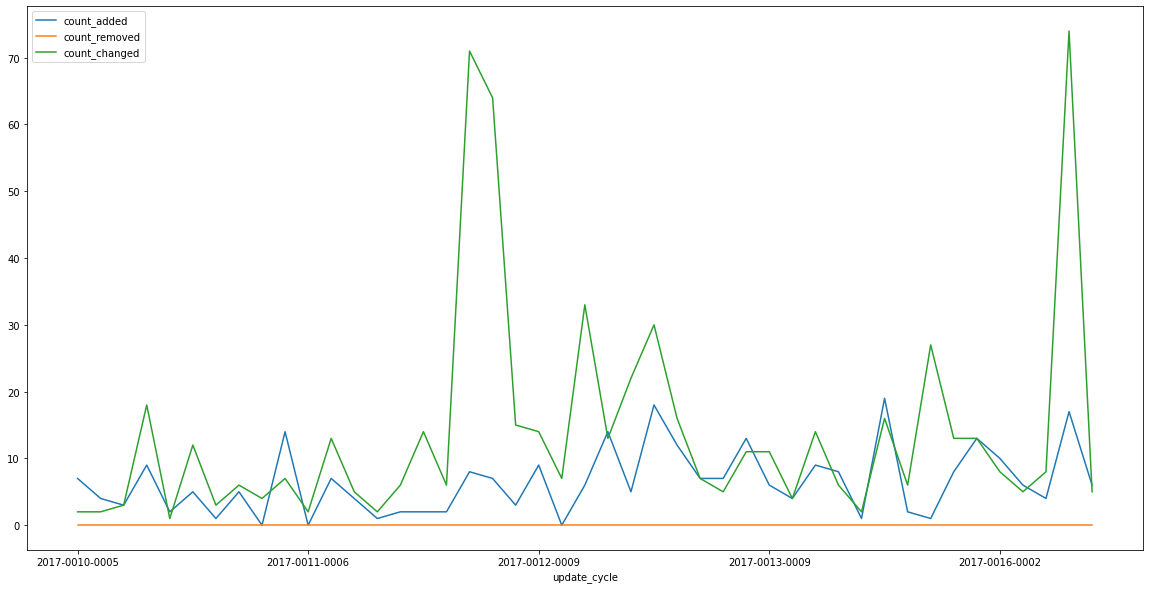

In [6]:
################################################################################
# Changes in each update - 2019 only
################################################################################
relevant_cycles = list(df[(df["filter_date"] >= "2019-01-01") & 
                          (df["filter_date"] < "2020-01-01")
                         ]["update_cycle"].unique())
df_aggregation[(df_aggregation.index.isin(relevant_cycles))
              ][["count_added", "count_removed", "count_changed"]
              ].plot(figsize=(20,10))

<AxesSubplot:xlabel='update_cycle'>

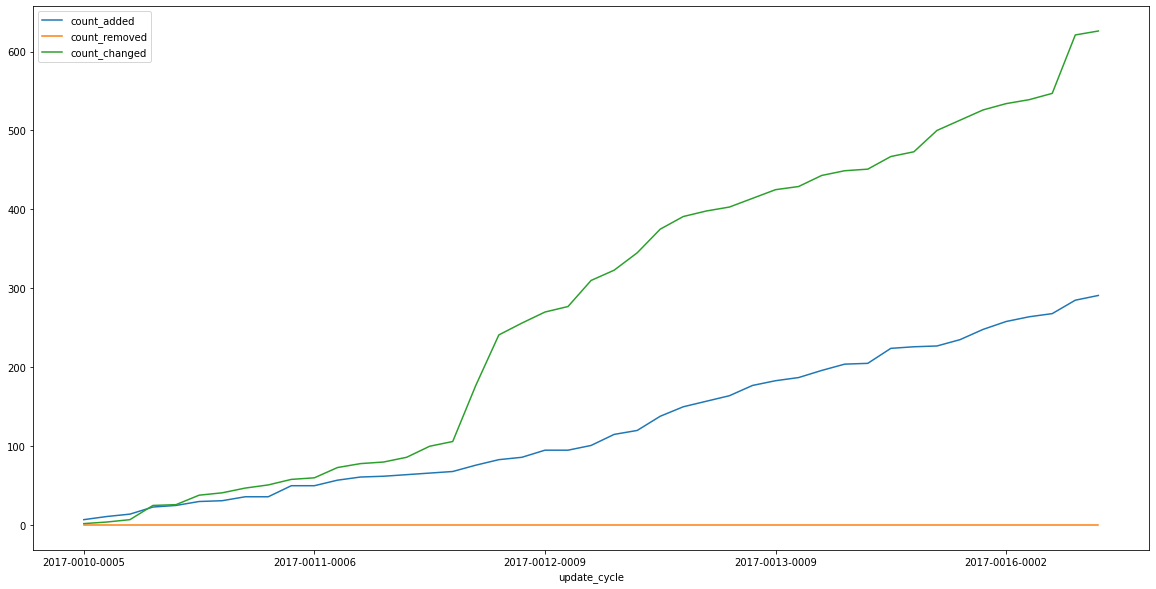

In [7]:
################################################################################
# Cumulative changes in each update - 2019 only
################################################################################
df_aggregation[(df_aggregation.index.isin(relevant_cycles))
              ][["count_added", "count_removed", "count_changed"]
              ].cumsum().plot(figsize=(20,10))

In [8]:
################################################################################
# Table of total hereditaments and update changes - June to December 2019 only
################################################################################
relevant_cycles = list(df[(df["filter_date"] >= "2019-06-01") & 
                          (df["filter_date"] < "2019-12-31")
                         ]["update_cycle"].unique())
df_aggregation[(df_aggregation.index.isin(relevant_cycles))]

,count_total,count_added,count_removed,count_changed
update_cycle,,,,
2017-0013-0001,9578,6,0,33
2017-0013-0002,9592,14,0,13
2017-0013-0003,9597,5,0,22
2017-0013-0004,9615,18,0,30
2017-0013-0005,9627,12,0,16
2017-0013-0006,9634,7,0,7
2017-0013-0007,9641,7,0,5
2017-0013-0008,9654,13,0,11
2017-0013-0009,9660,6,0,11


While the early period of the 2017 rates revaluation demonstrated some significant change, the 2019 period is consistent. No hereditaments were withdrawn over the period, there were 626 changes, and 291 hereditaments were added to the register. The total hereditaments increased almost 3% to 9,927 by the end of 2019.

# Barnsley Metropolitan Borough Council data review

Each of the 348 English and Welsh local authorities require complete knowledge of ratepayers for each commercial hereditament. Most routinely publish these data to their websites; some annually, monthly, or anything in between. There is no standard data format, which are released using multiple definitions, data structures, and file types. 

The absence of standards has resulted in a diverse and incompatible range of definitions on everything from business activity, to building use, to multiple *unique* identity and geographic systems. Adding to the complexity are scarce data skills leading to publication of incompatible data formats, or even resistance to publication.

## Sqwyre study methodology

Where an observational study is weighted by the physical process of sending fieldworkers out to conduct surveys, our main analytical task is data-wrangling; to find, acquire, import, restructure and validate all data published by public sources. During 2018, two years after the start of the Sqwyre study, we became concerned at the gradual deletion of the source data which inform our database by local authorities. That means, often, Sqwyre is the only record of an historical location-based event. To that end, we developed an open source data wrangling toolkit called [whyqd](https://whyqd.readthedocs.io/). This was launched in mid-2019, and Barnsley's October 2019 dataset was the first of their releases to be imported using this standardised and auditable approach.

No matter how local authorities choose to publish, we receive a list of each ratepayer change to all hereditaments for the period between updates. The data we import are:

- Billing authority hereditament reference code (linking the hereditament to the VOA database reference)
- Firm's trading name (i.e. ratepayer)
- Full hereditament address (number, street, postal code, town)
- Occupied / Vacant status
- Date of occupation / vacancy
- Actual annual rates charged (in Pounds)
- List of reliefs / exemptions received by the ratepayer

Not all of these are provided, and sometimes not for all data released in the same update series. Our extract-transform-load process restructures these messy data into a single schema. These transformed data files are subjected to additional analysis and matching against the existing current VOA data. A matching quality score is offered for each data row, and passing data are imported into the main database. 

Matching is performed according to the Levenshtein Distance of the VOA Unique Address Reference Numbers (UARN) and address for each hereditament, and producing a probably of matching score. We pick the highest probability match for each address.

## Sources of error, and sensible defaults

The objective for the Sqwyre commercial location database is to produce a well-structured, standardised dataset for research and analysis. 

Sources of ambiguity which prevent matching include:

- Unclear, or missing, hereditament reference codes,
- Duplicate rows with conflicting dates and occupation status,
- Provided data not covering the complete list of VOA hereditaments,
- Provided data for hereditaments not yet registered with VOA.

Hereditaments are continually being added, removed and updated in the register. Ordinarily, such updates are the result of engagement between the local authority and VOA. However, there is a physical delay for information to be processed - either to be added by the VOA, or by the local authority - and so there will always be some small number of hereditaments which remain stranded. Over a long enough series of updates, all activity should be captured.

Where hereditament activity is unclear, we resolve to do no forecasting or estimation of activity but to adopt sensible defaults:

- All hereditaments of unknown occupation status are regarded as `occupied`; we prefer to underestimate than overestimate vacancy,
- Hereditaments with missing floor areas but with a rateable value receive an estimated floor area based on nearby hereditaments of the same category of use, since VOA estimates such valuations using standardised multipliers,

We do no other changes.

This establishes a history for each commercial hereditament, with the date of ratepayer change, giving us the period of occupation or vacancy, the name of the ratepayer (if a company), and any rates reliefs or exemptions.

## History of Barnsley data imports

Sqwyre began curating local authority data in March 2016. At the time, while Barnsley published ratepayer data, this did not include the unique hereditament numbers necessary to reconcile them with the VOA master database.

We filed a [Freedom of Information request (FOI)](https://www.whatdotheyknow.com/request/complete_non_residential_busines_215https://www.whatdotheyknow.com/request/complete_non_residential_busines_215) via What Do They Know for the missing references to be included. On 14 April 2016, Barnsley undertook to do this. The first data we were able to include with these additions was in April 2017, 12 months later.

Subsequently, Barnsley's data were released twice annually, with updates for April and October of each year. In 2020, there was no April release. We filed an [FOI request](https://www.whatdotheyknow.com/request/complete_non_residential_busines_1891https://www.whatdotheyknow.com/request/complete_non_residential_busines_1891) on 9 July 2020 requesting publication. On 11 August 2020, Barnsley replied stating they wouldn't be releasing data in response to the FOI request, since they intended to publish at some future date.

By the end of our March 2021 update cycle, we had not yet discovered any Barnsley updates, although their October 2020 release was brought to our attention in April 2021.

This explains the 18 month gap, from October 2019 to the present, when approximately three potential update releases were not available for inclusion in the Sqwyre data series. We have, however, included their October 2020 release in the analysis that follows.

In [9]:
################################################################################
# 2. Barnsley Metropolitan Borough Council data review
#  - Within each series, what proportion of hereditaments can be unambiguously 
#    classified in terms of occupation status, and how does ambiguity arise?
#  - What proportion of the total count of the hereditament base, as defined by 
#    the VOA, are represented in ratepayer data updates?
################################################################################

# Specify column import types
dtype_dict = {
    "ba_ref": str,
    "rates_code": str,
    "occupation_state": bool
}
parse_dates = ["occupation_state_date"]
# Get all source data
chunks = []
for file in os.listdir(directory):
    if file.startswith("E08000016_"):
        chunk = pd.read_csv(directory + file, 
                            dtype = dtype_dict, 
                            parse_dates = parse_dates)
        chunk["update_cycle"] = file.split(".")[0].split("_")[-1]
        chunks.append(chunk)

df = pd.concat(chunks)

# Do analysis based on ba_ref (which Barnsley provide) and rates_code 
# (which Sqwyre software matches)

aggregation = {
    "update_cycle": [],
    "ba_ref_duplicates": [],
    "ba_ref_added": [],
    "ba_ref_removed": [],
    "ba_ref_void": []
}
df.sort_values(by=["update_cycle", "ba_ref", "occupation_state_date"], 
               inplace=True)

previous_references = set()

for update_cycle, group in df.groupby("update_cycle"):
    if previous_references:
        # Remove duplicates and take the last
        total_count = len(group)
        group = group.copy()
        group.drop_duplicates(subset=["ba_ref"], keep="last", inplace=True)
        unique_count = len(group)
        # Get all unique rates codes in this update cycle
        current_references = set(group["ba_ref"].tolist())
        # Get all void rates codes
        void_references = set(group[group["occupation_state"] == False
                                   ]["ba_ref"].unique())
        # Start aggregation
        aggregation["update_cycle"].append(update_cycle)
        ba_ref_duplicates = total_count - unique_count
        ba_ref_added = len(current_references - previous_references)
        ba_ref_removed = len(previous_references - current_references)
        ba_ref_void = len(void_references)
        aggregation["ba_ref_duplicates"].append(ba_ref_duplicates)
        aggregation["ba_ref_added"].append(ba_ref_added)
        aggregation["ba_ref_removed"].append(ba_ref_removed)
        aggregation["ba_ref_void"].append(ba_ref_void)
    previous_references = set(group["ba_ref"].tolist())

In [10]:
################################################################################
# Table of changes in each update - full series
################################################################################
df_aggregation = pd.DataFrame.from_dict(aggregation)
df_aggregation.set_index("update_cycle", inplace=True)
df_aggregation

,ba_ref_duplicates,ba_ref_added,ba_ref_removed,ba_ref_void
update_cycle,,,,
005,0,155,101,702
007,0,2044,129,716
009,0,159,95,767
011,0,155,82,803
013,740,164,217,767
019,712,361,368,731


<AxesSubplot:xlabel='update_cycle'>

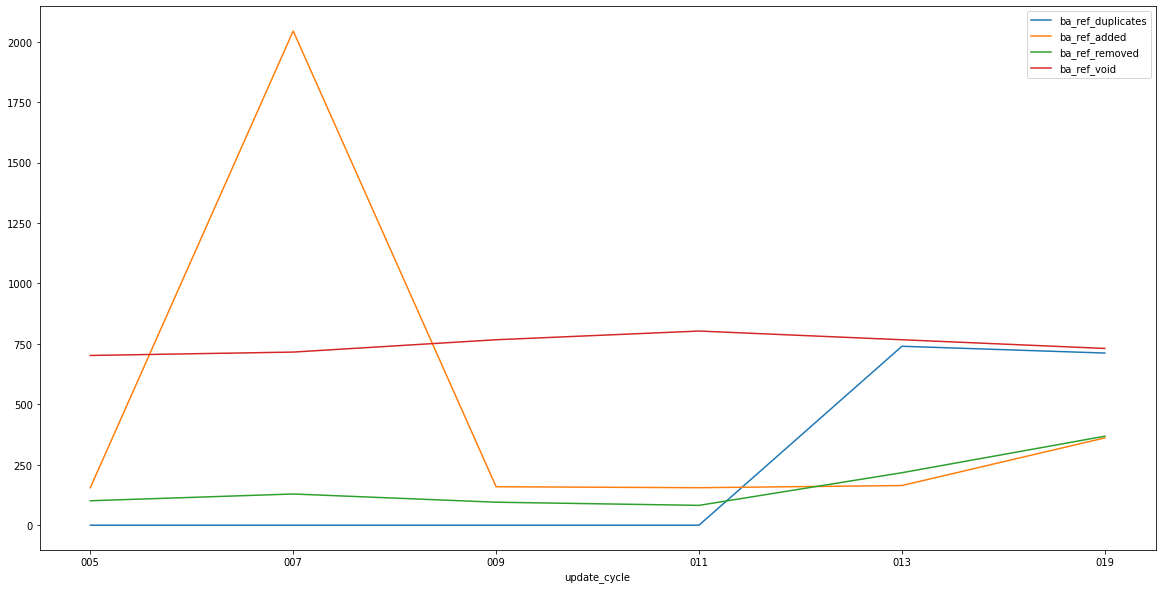

In [11]:
################################################################################
# Changes in each update - full series
################################################################################
df_aggregation.plot(figsize=(20,10))

Focusing on the 2019 period, and considering the consistency and quality of the data yields the following reports.

In [12]:
# Duplicates start in the area of concern, therefore need to interogate further
df.sort_values(by=["update_cycle", "ba_ref", "occupation_state_date", 
                   "occupation_state"], 
               inplace=True)

aggregation = {
    "update_cycle": [],
    "void_state": [],
    "occupied_state": [],
    "unclear_state": [],
    "date_clear": [],
    "date_clear_occupied": [],
    "date_unclear": [],
    "not_matched_total": [],
    "not_matched_void": [],
}

for update_cycle, group in df.groupby("update_cycle"):
    # Get the headline void and occupation totals
    group_tots = group.copy()
    group_tots.dropna(subset=["rates_code"], inplace=True)
    group_tots.sort_values(by=["rates_code", "occupation_state_date", 
                               "occupation_state"], 
                           inplace=True)
    group_tots.drop_duplicates(subset=["rates_code"], 
                               keep="last", 
                               inplace=True)
    void_state = len(group_tots[group_tots["occupation_state"] == False])
    occupied_state = len(group_tots[group_tots["occupation_state"] == True])
    # Remove duplicates and take the last
    group = group.copy()
    dup_group = group[group.duplicated(subset=["ba_ref"], keep=False)
                     ].sort_values(by=["ba_ref", "occupation_state_date"])
    # Get all mis-matches and void mis-matches only
    not_matched_total = (len(group["ba_ref"].unique()) - 
                         len(group[group["rates_code"].notnull()
                                  ]["rates_code"].unique()))
    ba_ref_voids = len((group[(group["occupation_state"
                                        ] == False) &
                                  (group["ba_ref"].notnull())
                                 ]["ba_ref"].unique()))
    rates_code_voids = len((group[(group["occupation_state"
                                        ] == False) &
                                  (group["rates_code"].notnull())
                                 ]["rates_code"].unique()))
    not_matched_void = ba_ref_voids - rates_code_voids
    # Aggregations
    unclear_state = 0
    date_clear = 0
    date_clear_occupied = 0
    date_unclear = 0
    for ba_ref, ref_group in dup_group.groupby("ba_ref"):
        # Unclear status, check if dates are clear
        unclear_state += 1
        if (ref_group["occupation_state_date"].isna().any() or 
            len(ref_group["occupation_state_date"].unique()) == 1):
            date_unclear += 1
        else:
            date_clear += 1
            if ref_group.iloc[-1]["occupation_state"]:
                # i.e. the last row/latest date of ambiguous data
                date_clear_occupied += 1
    # Start aggregation
    aggregation["update_cycle"].append(update_cycle)
    aggregation["void_state"].append(void_state)
    aggregation["occupied_state"].append(occupied_state)
    aggregation["unclear_state"].append(unclear_state)
    aggregation["date_clear"].append(date_clear)
    aggregation["date_clear_occupied"].append(date_clear_occupied)
    aggregation["date_unclear"].append(date_unclear)
    aggregation["not_matched_total"].append(not_matched_total)
    aggregation["not_matched_void"].append(not_matched_void)

In [13]:
################################################################################
# Table of changes in each update - full series
################################################################################
df_aggregation = pd.DataFrame.from_dict(aggregation)
df_aggregation.set_index("update_cycle", inplace=True)
df_aggregation

,void_state,occupied_state,unclear_state,date_clear,date_clear_occupied,date_unclear,not_matched_total,not_matched_void
update_cycle,,,,,,,,
003,713,6036,0,0,0,0,31,4
005,690,6108,0,0,0,0,36,12
007,712,8003,0,0,0,0,34,4
009,761,8011,0,0,0,0,41,6
011,799,8046,0,0,0,0,41,4
013,629,8136,740,616,5,124,68,14
019,594,8085,712,587,2,125,147,16


<AxesSubplot:xlabel='update_cycle'>

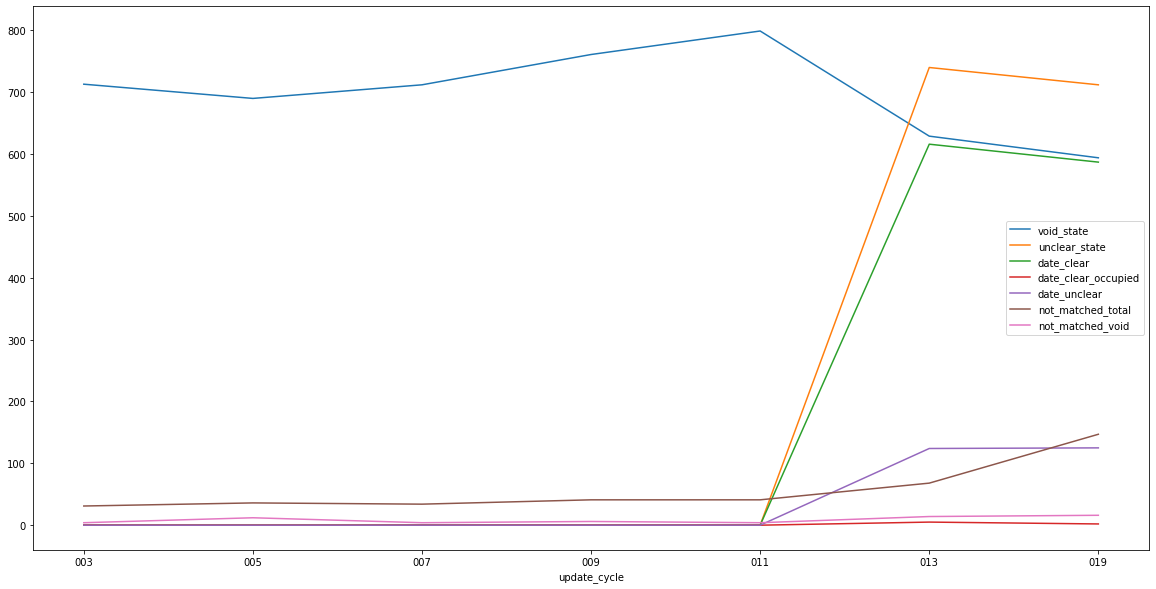

In [14]:
################################################################################
# Changes in each update - full series
################################################################################
df_aggregation.loc[ : , df_aggregation.columns != "occupied_state"
                  ].plot(figsize=(20,10))

Prior to October 2019 (cycle 011), Sqwyre audit systems were entirely manual, with manual processing and restructuring of data. That left structural decisions in the hands of the data wrangler with inevitable inconsistency. The last chart (above) may give the impression that Barnsley data "suddenly" became more unreliable but the reality is more likely that we simply missed earlier ambiguity which was subsequently resolved by the new system updates in mid-2019.

Even so, the October 2019 release does indicate a far greater proportion of ambiguous and non-matching data, as well an increasing gap between the total hereditaments listed by the VOA, and those published by Barnsley:

- VOA total hereditaments = 9,927
- Barnsley released hereditaments = 8,765 (1,162 gap)
- Barnsley total voids = 767 (7.6% of total hereditaments, 8.8% of Barnsley release)
- Barnsley void non-match to VOA data = 124 ambiguous + 5 resolved as occupied + 14 unmatched voids (18.6% of Barnsley voids)
- Barnsley matched voids = 629 (6.3% of total hereditaments)

At this stage, even before considering the Barnsley data intersection with that of the VOA, the total auditable void records is reduced by 18.6% and needs to be considered against a ratings list about 12% larger. Looking ahead to the October 2020 update, the rate of mismatching appears to be growing.

We now need to consider what those voids are in terms of the classifications for retail, office, industrial and leisure.

# Merged VOA and Barnsley data review

There are two forms of aggregation in the Sqwyre system. The first is performed at the end of each quarter, with the data current at that time, and these reports are released online at Sqwyre.com. They are not revised or updated following subsequent data corrections, presenting what was known at a fixed moment in time.

The second are aggregations performed in response to a specific research question. These aggregations, or queries, are generated using all the source data available - including any subsequent updates, corrections or restatements released by local authorities and the VOA - and customised to that particular research query.

The second approach leads to quarterly aggregations that may change from ones produced previously, depending on the date in which they were generated, since they include subsequent restatements.

Neither approach is better than the other, but they do have the potential to result in quite different values.

The review that follows is closer to the second approach since, as careful as a query may be structured, historical restatements now exist in the source data. It is no longer strictly possible - using the source data we have - to generate the exact aggregation report as generated on 31 December 2019. Given that the total number of vacant hereditament under review is 767 out of 9,927 at the time (7.6%), differences of a few hundred can have a dramatic effect on the vacancy rate even though they only constitute a percent of the total.

In [15]:
################################################################################
# 3. Merged VOA and Barnsley data review
#  - What changes occurred between Barnsley data in terms of reference numbers, 
#    matching quality and matching to live versus historic hereditaments?
#  - How do these changes interact over time?
#  - How do these changes impact on vacancy rates in general, temporally, and 
#    in each of the main segmentations (retail, office, etc)
################################################################################

################################################################################
# Merge will be performed as it would be on Sqwyre servers, using only VOA
# updates to the time of the local authority data release. Future corrections
# are excluded as best as possible as they wouldn't be known. Some artifacts
# may remain.
# Below is production code, modified slightly since this Notebook will use CSV
# and not database queries as source data.
# NOTE: a significant difference is that VOA update cycles don't map nicely to
#       frequency of release or a date. The below uses filter_date as a proxy
#       and status_date for subsequent sorting and filtering.
################################################################################

def parse_dates(x):
    """
    This is the hard-won 'trust nobody' date parser.
    """
    if pd.isnull(x): return pd.NaT
    # Check if to_datetime can handle things
    if not pd.isnull(pd.to_datetime(x, errors="coerce", dayfirst=True)):
        x = date.isoformat(pd.to_datetime(x, errors="coerce", dayfirst=True))
        return pd.to_datetime(x).tz_localize("UTC")
    # Manually see if coersion will work
    x = str(x).strip()[:10]
    x = re.sub(r"[\\/,\.]","-", x)
    try:
        y, m, d = x.split("-")
    except ValueError:
        return pd.NaT
    if len(y) < 4:
        # Swap the day and year positions
        # Ignore US dates
        d, m, y = x.split("-")
    # Fat finger on 1999 ... not going to check for other date errors
    if y[0] == "9": y = "1" + y[1:]
    x = "{}-{}-{}".format(y, m, d)
    try:
        x = datetime.strptime(x,"%Y-%m-%d")
    except ValueError:
        return pd.NaT
    x = date.isoformat(x)
    try:
        return pd.to_datetime(x).tz_localize("UTC")
    except pd.errors.OutOfBoundsDatetime:
        return pd.NaT

def merge_voa_and_la_reports(df_voa, df_la, cycle_date):
    """
    Merge VOA and local authority dataframes to create a single merged report.

    Args:
        df_voa: Pandas Dataframe
            VOA report current to this update cycle
        df_la: Pandas Dataframe
            Report from local authority

    Returns:
        Pandas DataFrame.
    """
    # Sort & filter df_voa to exclude hereditaments with None, 0, 1 floor area
    df_voa = df_voa.copy()
    df_voa.sort_values(by=["rates_code", "report_date"], inplace=True)
    df_voa.drop_duplicates(subset=["rates_code"], keep="last", inplace=True)
    # Sort and filter df_la to exclude duplicates and unmatched rates_codes
    df_la = df_la.copy()
    df_la.dropna(subset=["rates_code"], inplace=True)
    # Challenge for missing dates is to find a sensible default given there 
    # could be duplicates ... setting a future date could cause problems
    # 1. Where dupes, drop na
    dup_la = df_la[df_la.duplicated(subset=["rates_code"], keep=False)].copy()
    dup_la.dropna(subset=["status_date"], inplace=True)
    # 2. Drop all dupes, then fillna with cycle data
    df_la.drop_duplicates(subset=["rates_code"], keep=False, inplace=True)
    # 3. Concatenate to get everything back
    df_la = pd.concat([df_la, dup_la])
    df_la.sort_values(by=["rates_code", "update_cycle", 
                          "status_date", "status"], 
                      inplace=True)
    df_la.drop_duplicates(subset=["rates_code"], keep="last", inplace=True)
    # Perform the merge
    df_merge = df_voa.merge(df_la, how="left", on="rates_code")
    # Fix columns to ensure sensible defaults
    df_merge["status"].fillna(True, inplace=True)    
    set_bool = {"True": True, "False": False}
    df_merge["status"].map(set_bool)
    # After the merge, non-matching rows won't have a status date
    df_merge["status_date"].fillna(cycle_date, inplace=True) 
    df_merge.sort_values(by=["rates_code", "status_date"], inplace=True)
    df_merge.drop_duplicates(subset=["rates_code"], keep="last", inplace=True)
    return df_merge.copy()

def get_quarter_from_cycle(cycle):
    """
    For a known cycle, but unkown VOA status start date, set the quarter 
    to the last day of the quarter, counted from OCCUPIER_BASE_QUARTER. 
    Legacy of the way we do quarterly update cycles for Sqwyre. These 
    start at 001 for the specific date of 1 July 2016. 

    Args:
        cycle: String for current location update cycle.

    Returns:
        Datetime (UTC timezone)
    """
    # Q3 2016, i.e. we make a request in one Q, for the previous Q
    OCCUPIER_BASE_QUARTER = "2016-07-01"
    TIME_ZONE = "Europe/London"
    # Base is 1 (i.e. first cycle), and three months per quarter
    # Then, get months to year change from base quarter
    y, m, d = [int(x) for x in OCCUPIER_BASE_QUARTER.split("-")]
    # Get number of months to year change from base quarter
    mths_to_1st_new_year = 12 - m + 1
    months = (int(cycle) + 1) * 3
    if months >= mths_to_1st_new_year:
        y = y + 1 + (months - mths_to_1st_new_year)//12
    m = (months - mths_to_1st_new_year)%12 + 1
    quarter = date.isoformat(datetime(y, m, 1))
    quarter = pd.to_datetime(quarter, format="%Y-%m-%d") \
                .tz_localize("UTC")
    # Get last date of the cycle
    quarter = (quarter - timedelta(days=1)).date()
    quarter = datetime.combine(quarter, datetime.min.time()
                           ).replace(tzinfo=pytz.utc)
    return pd.to_datetime(quarter)

# Open Barnsely VOA data as a Pandas dataframe
# Specify column import types
dtype_dict = {
    "location_code": str,
    "rates_code": str
}
parse_dates_list = ["report_date", "created_date", "effective_date", 
               "start_date", "end_date"]
voa_barnsely_source = "barnsley-2017-valuation-data.csv"
df_voa = pd.read_csv(directory + voa_barnsely_source, 
                     dtype = dtype_dict, 
                     parse_dates = parse_dates_list)
df_voa.rename(index=str,
              columns={
                  "category__grouped_by__grouped_by__description": "category_group",
              },
             inplace=True)
# Add in a column for date filtering
df_voa["filter_date"] = df_voa["start_date"]
df_voa["filter_date"].fillna(df_voa.effective_date, inplace=True)
# Filter out all VOA-assigned signifiers of removed hereditaments
df_voa = df_voa[(~df_voa["floor_area"].isin([None, 0, 1])) &
                (~df_voa["rental_valuation"].isin([None, 0, 1]))]

# Open Barnsley local authority data
# Specify column import types
dtype_dict = {
    "ba_ref": str,
    "rates_code": str,
    "occupation_state": bool
}
parse_dates_list = ["occupation_state_date"]
# Get all source data
chunks = []
for file in os.listdir(directory):
    if file.startswith("E08000016_"):
        chunk = pd.read_csv(directory + file, 
                            dtype = dtype_dict, 
                            parse_dates = parse_dates_list)
        cycle = file.split(".")[0].split("_")[-1]
        chunk["update_cycle"] = cycle
        chunk["occupation_state_date"].fillna(get_quarter_from_cycle(cycle), 
                                              inplace=True)
        # Ensure dates are "proper" dates
        chunk["occupation_state_date"] = chunk["occupation_state_date"
                                              ].apply(lambda x: parse_dates(x))        
        chunks.append(chunk)
df_la = pd.concat(chunks)
df_la.rename(index=str,
             columns={"occupation_state": "status",
                      "occupation_state_date": "status_date"
                     },
             inplace=True)

# Ratios of void by category aggregations
aggregation = {
    "update_cycle": [],
    "total_count": [],
    "total_count_excl": [],
    "void_retail": [],
    "void_office": [],
    "void_industrial": [],
    "void_leisure": [],
    "void_other": [],
}

# Get Barnsley unique update cycles
cycles = list(df_la["update_cycle"].unique())#[:-1]
cycles.sort()

# loop through updates in sequence
for update_cycle in cycles:
    cycle_end_date = get_quarter_from_cycle(update_cycle)
    # Filter Barnsley update
    df_c_la = df_la[df_la["update_cycle"] == update_cycle].copy()
    # Filter VOA data on report created_date
    df_c_voa = df_voa[df_voa["filter_date"] <= cycle_end_date].copy()
    # Merge
    df_merge = merge_voa_and_la_reports(df_c_voa, df_c_la, cycle_end_date)
    # Aggregate - total count EXCLUDES non-retail,industrial,leisure,office
    total_count = len(df_merge)
    total_count_excl = len(df_merge[df_merge["category_group"].notnull()])
    total_void = len(df_merge[df_merge["status"] == False])
    void_retail = len(df_merge[(df_merge["category_group"] == "Retail") & 
                               (df_merge["status"] == False)])
    void_office = len(df_merge[(df_merge["category_group"] == "Office") & 
                               (df_merge["status"] == False)])
    void_industrial = len(df_merge[(df_merge["category_group"] == "Industrial") 
                                   & 
                                   (df_merge["status"] == False)])
    void_leisure = len(df_merge[(df_merge["category_group"] == "Leisure") & 
                                (df_merge["status"] == False)])
    void_other = (total_void - void_retail - void_office -
                  void_industrial - void_leisure)
    aggregation["update_cycle"].append(update_cycle)
    aggregation["total_count"].append(total_count)
    aggregation["total_count_excl"].append(total_count_excl)
    aggregation["void_retail"].append(void_retail)
    aggregation["void_office"].append(void_office)
    aggregation["void_industrial"].append(void_industrial)
    aggregation["void_leisure"].append(void_leisure)
    aggregation["void_other"].append(void_other)

In [16]:
################################################################################
# Table of changes in each update - full series
################################################################################
df_aggregation = pd.DataFrame.from_dict(aggregation)
df_aggregation.set_index("update_cycle", inplace=True)
df_aggregation

,total_count,total_count_excl,void_retail,void_office,void_industrial,void_leisure,void_other
update_cycle,,,,,,,
003,6959,6103,207,263,175,13,47
005,7127,6255,202,125,165,32,151
007,9179,8268,200,282,172,12,46
009,9364,8320,225,289,179,8,60
011,9509,8288,207,277,175,8,131
013,9630,8322,178,246,142,8,55
019,10065,8519,164,241,110,6,71


<AxesSubplot:xlabel='update_cycle'>

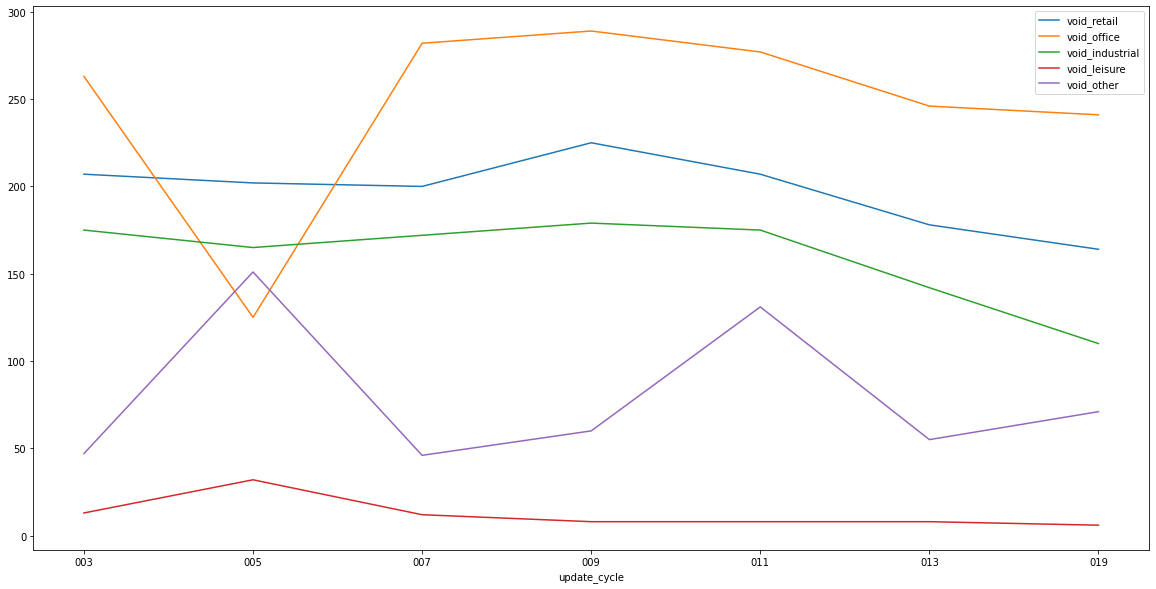

In [17]:
################################################################################
# Changes in each update - full series
################################################################################
df_aggregation[["void_retail","void_office","void_industrial",
                "void_leisure","void_other"]].plot(figsize=(20,10))

Following the merge, excluding all withdrawn and inactive hereditaments, the total live hereditaments dropped slightly. For the October 2019 release (with the quarter ending 31 December 2019):

- VOA total live hereditaments = 9,630 (8,322 when excluding non-retail, office, leisure and industrial hereditaments)
- Barnsley released hereditaments = 8,765 (91% of total hereditaments)
- Barnsley total voids = 767 (8% of total hereditaments, 8.8% of Barnsley release)
- Barnsley void non-match to VOA data = 124 ambiguous + 5 resolved as occupied + 14 unmatched voids (18.6% of Barnsley voids)
- Barnsley matched voids = 629 (6.5% of total hereditaments)
- Barnsley voids in Retail, Office, Industrial, Leisure = 574 (6.9% of 8,322)

At this point of the review, the initial 767 voids have been reduced to 574, or a decrease of about 25%, for a total vacancy of 6.9%. The average vacancy rate for England and Wales on 31 December 2019 was just under 7%, indicating Barnsley as experiencing average levels of vacancy.

As described above, it is difficult to replicate the original analysis exactly, but there doesn't appear to be any grounds for considering Barnsley's vacancy levels to be significant or remarkable.

The core deflators of Barnsley's stated vacancy rate are:

- Understating the total number of hereditaments (declaring 8,765 vs 9,630 in the VOA register),
- Ambiguous or irreconcilable hereditaments (138 out of 767 are ambiguous),
- Including non-retail, office, industrial or leisure hereditaments in the total (55 hereditaments classified as `other` in the total).

**This stated**, this is **not** how we aggregate quarterly data for Sqwyre. We treat historical updates as being congruent with the latest updates. A quarterly aggregation report is the extent of all previous activity. Given that Barnsley present a subset of the complete hereditament record (undercounting by over 1,000 records) this may have a dramatic effect when taken cumulatively.

## Ensuring adherence to sensible defaults

So far, the text, tabular and visualisation components of the report did not require coding knowledge, even though the code for the analysis is presented here. However, a short discussion of two lines of code is required:

    df_la.sort_values(by=["rates_code", "update_cycle", "status_date", "status"], 
                      inplace=True)
    df_la.drop_duplicates(subset=["rates_code"], keep="last", inplace=True)
                      
These lines of code are found in rows `84` to `86` of section 3 above. Assume we have a table with the following data indicating a history, including restatements of that history, for an individual hereditament over four update cycles:

| rates_code     | update_cycle | status_date | status |
|----------------|--------------|-------------|--------|
| 50101002002522 | 005          | 2017-05-09  | FALSE  |
| 50101002002522 | 007          | 2016-10-30  | TRUE   |
| 50101002002522 | 009          | 2017-06-21  | TRUE   |
| 50101002002522 | 013          | 2018-07-08  | FALSE  |
| 50101002002522 | 013          | 2018-07-08  | TRUE   |

These are entirely fictitious, but the columns are defined as follows:

- *rates_code*: the unique reference number for a hereditament,
- *update_cycle*: the specific quarterly update cycle during which that data was imported to Sqwyre,
- *status_date*: the date at which the changes reflected in this update became effective,
- *status*: the occupation state of the hereditament, where `TRUE` is occupied, and `FALSE` is void (or vacant).

Cycle 005 gives a `status_date` of vacant on 9 May 2018, but cycle 007 gives a `status_date` of occupied 30 October 2017. How should we interpret this? We treat this is a *historical restatement*. 

The core of the work performed by the VOA is managing, reviewing and implementing such restatements. As demonstrated above, publishing changes and updates accounts for the majority of the data in fortnightly updates. Such information includes revaluations, changes of category of use, and changes to floor area, including numerous other administrative changes which may have no impact on any of the aggregations Sqwyre produces.

Managing such restatements, and maintaining a consistent and continuous historical record, is a critical part of performing data curation for a longitudinal study. 

An aggregation, however, is not a reflection of the history of an area, but of its particular status at a specific moment in time. That means all ambiguities in the timeline for each hereditament must be resolved.

We sort each of the columns in the following order: 1 `rates_code`, 2 `update_cycle`, 3 `status_update`, 4 `status`. The meaning of this is that a restatement of a date takes precidence over dates from previous updates; and the status of a location takes precidence over previous dates in previous updates.

For the above example, that means for an aggregation drawn at the end of update cycle `007`, the hereditament listed would be regarded as `occupied` and the specific record for vacant - even though the date is more recent - would be regarded as having been replaced (restated) by the more recent record.

In cycle `013` we get a more obvious ambiguity, and here the choice for any such conflict where on one date a site is somehow both occupied and vacant, is to treat it as occupied.

All these choices and processes are encapsulated in these two commands:

    df_la.sort_values(by=["rates_code", "update_cycle", "status_date", "status"], 
                      inplace=True)
    df_la.drop_duplicates(subset=["rates_code"], keep="last", inplace=True)
    
These commands state: ***sort data values** by each column, in order, and **drop duplicates** for each unique hereditmaent code, keeping only the last row for each duplicated set of codes.*
                      
The aggregation is a snapshot, but the complete record continues to be maintained in our database, such as the record below:

![History example](data/history-example.png)

*Figure 4: Extract of history from one specific hereditament. Source: Sqwyre.com*

Ordinarily, restatements are rare. A dispute with a landlord as to when, exactly, their hereditament became vacant, for example, may be updated. Or a floor area reviewed and modified. Sometimes, as with the periodic rates revaluations, an entire database may be updated simultaneously.

The following code makes two simple changes to the program listed above:

- When performing the merge, the previous data are concatenated to the latest data for that cycle, and the aggregation is drawn from that. 
- Instead of performing updates only with Barnsley data releases, the algorithm runs quarterly sequentially, exactly as Sqwyre aggregations are produced, with historical data used, even though updates are lagging.

The results are dramatic.

In [18]:
################################################################################
# Running the merge again, but also keeping a running history of all updates
# provided by Barnsley for a full reconciliation of known data.
################################################################################

# Ratios of void by category aggregations
aggregation = {
    "update_cycle": [],
    "total_count": [],
    "total_count_excl": [],
    "void_retail": [],
    "void_office": [],
    "void_industrial": [],
    "void_leisure": [],
    "void_other": [],
    "void_percent": []
}

# Create list of update cycles
cycles = [("0" * (3 - len(str(x))) + str(x)) for x in range(3,20)]

chunks = []
# loop through updates in sequence
for update_cycle in cycles:
    cycle_end_date = get_quarter_from_cycle(update_cycle)
    # Filter Barnsley update and check for NaT
    df_c_la = df_la[df_la["status_date"] <= cycle_end_date].copy()
    # Filter VOA data on report created_date
    df_c_voa = df_voa[df_voa["filter_date"] <= cycle_end_date].copy()
    # Merge and filter for latest unique
    chunks.append(merge_voa_and_la_reports(df_c_voa, df_c_la, cycle_end_date))
    df_merge = pd.concat(chunks).copy()
    df_merge.sort_values(by=["rates_code", "status_date", "status"
                            ], inplace=True)
    df_merge.drop_duplicates(subset=["rates_code"], keep="last", inplace=True)
    # Aggregate - total count EXCLUDES non-retail,industrial,leisure,office
    total_count = len(df_merge)
    total_count_excl = len(df_merge[df_merge["category_group"].notnull()])
    total_void = len(df_merge[df_merge["status"] == False])
    void_retail = len(df_merge[(df_merge["category_group"] == "Retail") & 
                               (df_merge["status"] == False)])
    void_office = len(df_merge[(df_merge["category_group"] == "Office") & 
                               (df_merge["status"] == False)])
    void_industrial = len(df_merge[(df_merge["category_group"] == "Industrial") 
                                   & 
                                   (df_merge["status"] == False)])
    void_leisure = len(df_merge[(df_merge["category_group"] == "Leisure") & 
                                (df_merge["status"] == False)])
    void_other = (total_void - void_retail - void_office -
                  void_industrial - void_leisure)
    void_percent = f"{(total_void - void_other) / total_count_excl * 100:.2f}"
    aggregation["update_cycle"].append(update_cycle)
    aggregation["total_count"].append(total_count)
    aggregation["total_count_excl"].append(total_count_excl)
    aggregation["void_percent"].append(void_percent)
    aggregation["void_retail"].append(void_retail)
    aggregation["void_office"].append(void_office)
    aggregation["void_industrial"].append(void_industrial)
    aggregation["void_leisure"].append(void_leisure)
    aggregation["void_other"].append(void_other)

In [19]:
################################################################################
# Table of changes in each update - full series
################################################################################
df_aggregation = pd.DataFrame.from_dict(aggregation)
df_aggregation.set_index("update_cycle", inplace=True)
df_aggregation

,total_count,total_count_excl,void_retail,void_office,void_industrial,void_leisure,void_other,void_percent
update_cycle,,,,,,,,
003,6959,6103,161,147,116,14,17,7.18
004,7050,6179,157,127,106,13,18,6.52
005,7127,6255,61,42,47,8,10,2.53
006,9148,8274,55,37,41,8,10,1.70
007,9179,8268,126,114,82,8,17,3.99
008,9258,8261,116,104,77,6,30,3.67
009,9364,8320,88,81,54,3,37,2.72
010,9417,8331,72,64,40,3,42,2.15
011,9509,8288,95,93,70,5,124,3.17


<AxesSubplot:xlabel='update_cycle'>

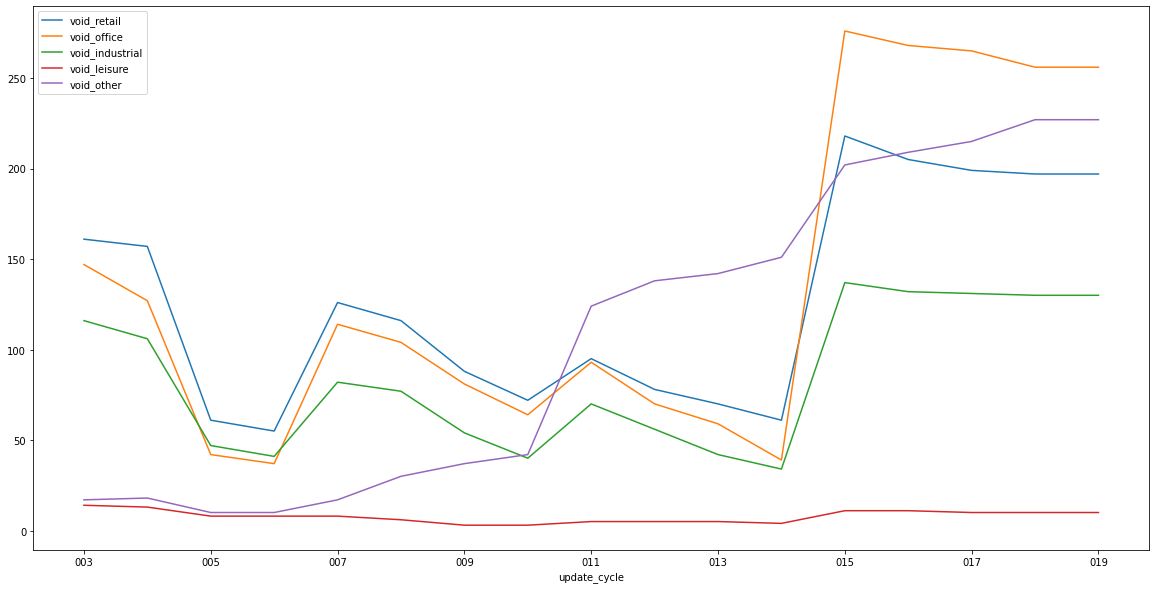

In [20]:
################################################################################
# Changes in each update - full series
################################################################################
df_aggregation[["void_retail","void_office","void_industrial",
                "void_leisure","void_other"]].plot(figsize=(20,10))

Following the continuous build, the following emerges for October 2019:

- Non-continuous discrete method: voids in Retail, Office, Industrial, Leisure = 574 (6.9% of 8,322)
- Continuous method: voids in Retail, Office, Industrial, Leisure = 176 (2.1% of 8,322)

What is remarkable here is not that the voids are so low in comparison to the source data, but that they were high in previous aggregations:

![Barnsley Voids & Occupation Overview](data/barnsley-voids-overview.png)

This is, most likely, as a result of continuous VOA restatements. Overall vacancy in updates `003` and `005` were 7.2% and 6.5% respectively, exactly as it appears in the chart. Thereafter, it begins to fall rapidly. This fall seems to be precipitated by an enormous rise in the number of hereditaments as 2,000 new records are introduced (increasing the total hereditament count from 7,000 to 9,000 and instantly deflating the vacancy rate although the absolute number of voids did not change that much).

From April 2019, another major change as the number of vacant hereditaments classified as "Other" rises and becomes dominant. Then, in June 2020 another enormous shift as overall vacancy levels rise to 7.6%.

What information triggered this vacancy increase in June 2020? That would be the October 2020 update, which was only received in April 2021.

# Conclusions and recommendations

The objective of this review was to ensure that any result is derived from a transparent and replicable process. Reasonable people can debate what constitutes a sensible default, or how to resolve contradictions and ambiguity in source data. All of that depends on transparency in the first place, both in public disclosure of source data, and in the code and algorithms which curate that source data.

The specific defaults used to aggregate the historical record for a quarterly report for each hereditament are designed to ensure that restatements and corrections take precedence over previous updates. Each successive update takes precedence over the ones which came before. This ensures corrections happen, but can also leave long-term errors in place if no subsequent updates, or corrections, are released.

Much of the challenge of curating and merging commercial location data derives from the lack of consistent definitions, data schemas, and regular updates by local authorities. A concern about aggregate data in April 2021 would never have arisen if Barnsley had simply published their April 2020 and October 2020 updates on time. Instead, a period of 18 months passed before new data was released, and an error arising from some ambiguity in their own previous releases was never corrected.

What can be stated is that, at the time that the aggregation generated in February 2021 was released, it was an accurate reflection of the data curated in the Sqwyre database. No bias or error appears to have caused the observed anomally which could not be replicated in the source data, and each of the large deviations can now be explained.

- Barnsley first cross-referenced data release in Q2 2017, six months after the start of our data series, leading to an initial 0% vacancy as a result of our default approach,
- Transition from 2010 to 2017 rates valuation in April 2017 coincides with a dramatic change in categorisation of hereditaments from office to leisure, revealed by a large change effecting 756 hereditaments,
- In October 2019 we received the last update from Barnsley for what would be about 18 months. That update resulted in a dramatic change in voids. This appears to be a result of further restatements in both Barnsley and VOA source data which precipitated a correction.

Clearly, such dramatic restatements are in no-ones interest, and cause challenges for researchers and policy-makers alike. They can also be avoided - or, at least, significantly mitigated - by adopting the following recommendations:

- Local authorities must publish their register of commercial ratepayers quarterly and continuously, and - at a minimum - include the following fields:
    - Billing authority hereditament reference code (linking the hereditament to the VOA database reference)
    - Firm's trading name (i.e. ratepayer)
    - Full hereditament address (number, street, postal code, town)
    - Occupied / Vacant status
    - Date of occupation / vacancy
    - Actual annual rates charged (in Pounds)
    - List of reliefs / exemptions received by the ratepayer
- Standardise definitions of what constitutes occupation status, categories of reliefs / exemptions, dates for occupation status, and - critically - consistent and high-quality use of hereditament reference numbers for each record.

Consistent and regular updates will not prevent future errors. We are human, and mistakes are inevitable. What it will do is ensure that corrections are swiftly brought into the custodial record.